# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning 

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a **regression problem**.

The data and evaluation metric we'll be using (root mean square log error or RMSLE) is from the [Kaggle Bluebook for Bulldozers competition](https://www.kaggle.com/c/bluebook-for-bulldozers/overview).


## 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?

## 2. Data

Looking at the [dataset from Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), you can you it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

**Bulldozer.csv** - Historical bulldozer sales examples up to 2012 (close to 400,000 examples with 50+ different attributes, including `SalePrice` which is the **target variable**).

## 3. Evaluation

For this problem, [Kaggle has set the evaluation metric to being root mean squared log error (RMSLE)](https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation). As with many regression evaluations, the goal will be to get this value as low as possible.

To see how well our model is doing, we'll calculate the RMSLE and then compare our results to others on the [Kaggle leaderboard](https://www.kaggle.com/c/bluebook-for-bulldozers/leaderboard).

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

For this dataset, Kaggle provide a data dictionary which contains information about what each attribute of the dataset means. You can [download this file directly from the Kaggle competition page](https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (account required) or view it on Google Sheets.

With all of this being known, let's get started! 


### Importing the data and preparing it for modelling

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/Bulldozer.csv", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
data = pd.read_csv("./data/Bulldozer.csv", low_memory=False,parse_dates=["saledate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [7]:
data.sort_values(by=["saledate"], ascending =True, inplace=True)

In [8]:
data.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [9]:
df_copy = data.copy()

In [10]:
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day

df_copy["dayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["dayOfYear"] = df_copy.saledate.dt.dayofyear

df_copy.drop("saledate" , axis = 1, inplace =True)

In [11]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,dayOfWeek,dayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Missing Data Imputations

In [12]:
import pandas.api.types as ptp

ptp.is_string_dtype(df_copy["saleYear"])

False

In [13]:
for column_name, column_content in df_copy.items():
    if ptp.is_string_dtype(column_content):
        print(column_name)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
# convert string dtypes into category dtype
for column_name, column_content in df_copy.items():
    if ptp.is_string_dtype(column_content):
        df_copy[column_name] = column_content.astype("category")

In [15]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [16]:
df_copy.Hydraulics_Flow.cat.categories

Index(['High Flow', 'None or Unspecified', 'Standard'], dtype='object')

In [17]:
df_copy.Hydraulics_Flow.cat.codes

205615   -1
274835   -1
141296   -1
212552   -1
62755    -1
         ..
410879   -1
412476    2
411927   -1
407124   -1
409203   -1
Length: 412698, dtype: int8

In [18]:
np.unique(df_copy.Hydraulics_Flow.cat.codes)

array([-1,  0,  1,  2], dtype=int8)

In [19]:
df_copy.Hydraulics_Flow.value_counts()

Standard               44251
High Flow                597
None or Unspecified       27
Name: Hydraulics_Flow, dtype: int64

In [20]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,dayOfWeek,dayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [21]:
for column_name, column_content in df_copy.items():
    if ptp.is_numeric_dtype(column_content):
        print(column_name)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
dayOfWeek
dayOfYear


In [22]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [23]:
for column_name, column_content in df_copy.items():
    if ptp.is_numeric_dtype(column_content):
        df_copy[column_name].fillna(column_content.median(), inplace=True)

In [24]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                     0
YearMade                         0
MachineHoursCurrentMeter         0
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [25]:
# convert categories into numeric values
# may need to hold category encodings for future use. May use a dictionary...
for column_name, column_content in df_copy.items():
    if not ptp.is_numeric_dtype(column_content):
        df_copy[column_name] = df_copy[column_name].cat.codes

In [26]:
df_copy.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,dayOfWeek,dayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,-1,4592,...,0,7,5,-1,-1,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,-1,1819,...,-1,-1,-1,3,1,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,-1,2347,...,0,7,5,-1,-1,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,-1,1818,...,-1,-1,-1,3,1,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,-1,2118,...,0,5,4,-1,-1,1989,1,31,1,31


### Create Regressor and Train a Model

In [27]:
X = df_copy.iloc[:, 2:57]
X.head()

,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,dayOfWeek,dayOfYear
205615,1126363,8434,132,18.0,1974,0.0,-1,4592,1743,-1,...,0,7,5,-1,-1,1989,1,17,1,17
274835,1194089,10150,132,99.0,1980,0.0,-1,1819,558,-1,...,-1,-1,-1,3,1,1989,1,31,1,31
141296,1473654,4139,132,99.0,1978,0.0,-1,2347,712,58,...,0,7,5,-1,-1,1989,1,31,1,31
212552,1327630,8591,132,99.0,1980,0.0,-1,1818,557,-1,...,-1,-1,-1,3,1,1989,1,31,1,31
62755,1336053,4089,132,99.0,1984,0.0,-1,2118,682,20,...,0,5,4,-1,-1,1989,1,31,1,31


In [28]:
y = df_copy["SalePrice"]

In [77]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_jobs=-1)


In [56]:
%%time
regressor.fit(X,y)

Wall time: 1min 21s


RandomForestRegressor(n_jobs=-1)

In [57]:
regressor.score(X,y)

0.9876471697686524

In [29]:
df_train = df_copy[df_copy.saleYear < 2012]
df_test = df_copy[df_copy.saleYear == 2012]

print(len(df_train) , len(df_test) )

401125 11573


In [30]:
X_train = df_train.iloc[:, 2:57]
y_train = df_train.SalePrice

X_test = df_test.iloc[:, 2:57]
y_test = df_test.SalePrice

In [31]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_pred):
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

def print_scores(regressor, X_train, X_test, y_train , y_test):
    train_pred = regressor.predict(X_train)
    test_pred = regressor.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred), 
             "Test MAE": mean_absolute_error(y_test, test_pred),
             "Training R2": r2_score(y_train, train_pred), 
             "Test R2": r2_score(y_test, test_pred),
             "Training RMSLE": rmsle(y_train, train_pred), 
             "Test RMSLE": rmsle(y_test, test_pred)}
    return scores
    

In [72]:
regressor = RandomForestRegressor(n_jobs= -1, max_samples = 10000, max_depth = 20)

In [73]:
%%time
regressor.fit(X_train, y_train)

Wall time: 2.54 s


RandomForestRegressor(max_depth=20, max_samples=10000, n_jobs=-1)

In [74]:
print_scores(regressor, X_train, X_test, y_train, y_test)

{'Training MAE': 5527.345471216692,
 'Test MAE': 7027.457671402332,
 'Training R2': 0.8626463397689375,
 'Test R2': 0.8380154893890738,
 'Training RMSLE': 0.25759223426439637,
 'Test RMSLE': 0.28837545303394524}

In [32]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits = 5)

data_array = np.arange(1,21)
data_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [76]:
for train_index ,test_index in tscv.split(data_array):
    print(train_index ,test_index)

[0 1 2 3 4] [5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13] [14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [17 18 19]


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor

def neg_rmsle(y_test, y_pred):
    return -rmsle(y_test, y_pred)

rf_grid = {"n_estimators": np.arange(10, 101, 10),
          "max_depth": [None, 3, 5 , 10 , 20],
          "min_samples_split": np.arange(2,20,2),
          "max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

rmsle_scorer = make_scorer(neg_rmsle)

tscv = TimeSeriesSplit(n_splits=5)
rs_model = RandomizedSearchCV(RandomForestRegressor(), 
                              param_distributions=rf_grid,
                              n_iter = 10,
                              cv = tscv,
                              scoring = rmsle_scorer,
                              verbose =True,
                              n_jobs=-1)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   26.0s finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   scoring=make_scorer(neg_rmsle), verbose=True)

In [39]:
rs_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [40]:
result = pd.DataFrame(rs_model.cv_results_).sort_values(by=["rank_test_score"])
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_samples,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,13.763528,0.474816,0.889969,0.027879,100,8,10000,0.5,None,"{'n_estimators': 100, 'min_samples_split': 8, ...",-0.435665,-0.300713,-0.321453,-0.431870,-0.310026,-0.359946,0.060644,1
0,17.958421,1.303466,1.128107,0.174534,100,14,10000,0.5,20,"{'n_estimators': 100, 'min_samples_split': 14,...",-0.436657,-0.305986,-0.323628,-0.433093,-0.315005,-0.362874,0.059063,2
9,4.088092,0.320644,0.406884,0.070947,20,10,10000,0.5,None,"{'n_estimators': 20, 'min_samples_split': 10, ...",-0.445224,-0.304009,-0.326687,-0.432027,-0.323864,-0.366362,0.059664,3
7,4.189577,0.664545,0.972183,0.035800,60,10,10000,sqrt,10,"{'n_estimators': 60, 'min_samples_split': 10, ...",-0.457246,-0.395082,-0.385753,-0.472665,-0.409852,-0.424119,0.034563,4
5,1.872261,0.362985,0.412801,0.013032,20,18,10000,sqrt,10,"{'n_estimators': 20, 'min_samples_split': 18, ...",-0.459945,-0.397257,-0.384373,-0.472507,-0.419032,-0.426623,0.034411,5
4,4.517827,0.673051,1.027898,0.035668,60,16,10000,sqrt,10,"{'n_estimators': 60, 'min_samples_split': 16, ...",-0.463273,-0.398908,-0.388751,-0.471913,-0.414501,-0.427469,0.033882,6
6,2.565412,0.444885,0.153880,0.004764,10,10,10000,auto,5,"{'n_estimators': 10, 'min_samples_split': 10, ...",-0.502350,-0.444879,-0.421729,-0.501023,-0.449972,-0.463991,0.032220,7
2,1.015131,0.282763,0.384540,0.016556,20,14,10000,1,10,"{'n_estimators': 20, 'min_samples_split': 14, ...",-0.516460,-0.489104,-0.457322,-0.550962,-0.507144,-0.504198,0.030890,8
1,1.287680,0.462281,0.253560,0.008467,50,2,10000,1,3,"{'n_estimators': 50, 'min_samples_split': 2, '...",-0.669162,-0.645706,-0.625692,-0.661898,-0.647378,-0.649967,0.015000,9
3,2.045198,0.713326,0.465990,0.051592,90,10,10000,1,3,"{'n_estimators': 90, 'min_samples_split': 10, ...",-0.669918,-0.640250,-0.622414,-0.669800,-0.658235,-0.652123,0.018385,10


In [42]:
good_model = RandomForestRegressor(n_estimators=100, 
                                   min_samples_leaf = 7 , 
                                   min_samples_split = 4, 
                                   max_features=0.5, 
                                  n_jobs= -1, 
                                  max_depth=None,
                                  max_samples=None)
good_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=7, min_samples_split=4,
                      n_jobs=-1)

In [43]:
print_scores(good_model, X_train, X_test, y_train,y_test)

{'Training MAE': 3550.9264491031386,
 'Test MAE': 5935.375062671624,
 'Training R2': 0.9392513906554264,
 'Test R2': 0.8800290947862648,
 'Training RMSLE': 0.1726624558602609,
 'Test RMSLE': 0.24288661144717047}

In [44]:
good_model.feature_importances_

array([1.64828232e-02, 5.12966806e-02, 5.24118086e-03, 2.78563800e-03,
       1.86977506e-01, 2.87047439e-03, 1.01089444e-03, 4.98224827e-02,
       4.10191665e-02, 7.65893475e-02, 6.24992539e-03, 2.75214121e-02,
       1.49071520e-01, 4.91101795e-02, 5.11600431e-03, 6.01581506e-03,
       6.48177255e-03, 3.65505119e-03, 1.09814301e-01, 8.07388840e-04,
       2.37565690e-04, 9.28687367e-04, 1.41778067e-03, 1.97642161e-03,
       6.40795352e-05, 2.48648584e-03, 5.96218334e-03, 3.12283648e-03,
       4.22212767e-03, 8.49695216e-03, 4.40219426e-03, 5.75811903e-03,
       1.44649956e-03, 1.55526908e-03, 1.25226039e-02, 8.52727971e-04,
       2.01859276e-02, 6.67609096e-03, 7.72697845e-03, 1.99148248e-03,
       9.57534861e-04, 2.04097298e-03, 5.78925560e-04, 7.35892616e-04,
       2.94871655e-04, 5.77892895e-04, 3.19306256e-03, 2.01028146e-03,
       4.30168358e-04, 7.25766926e-04, 7.87337041e-02, 3.75038856e-03,
       4.71855022e-03, 2.34124477e-03, 8.93816507e-03])

In [46]:
import seaborn as sns 

def plot_features(feature_names, feature_importance, n = 20):
    df = pd.DataFrame({"features":feature_names , "feature_importances": feature_importance})
    df.sort_values(by=["feature_importances"], ascending = False, inplace= True)
    df.reset_index(drop=True, inplace = True)
    
    plt.figure(dpi=130)
    sns.barplot(data = df.head(n), x = "feature_importances", y= "features", orient = "h")
    

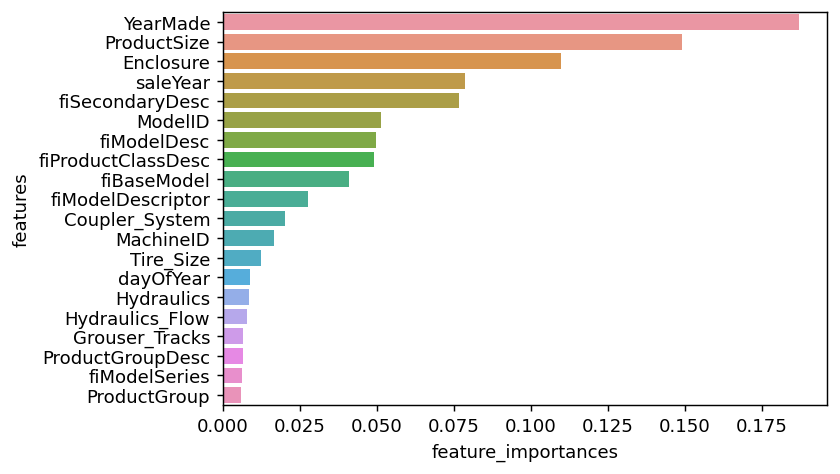

In [49]:
plot_features(X_train.columns, good_model.feature_importances_,n=20)

In [50]:
good_model.feature_importances_.sum()

0.9999999999999999